In [1]:
"""
Plot specific traj:
    plotSpecific("path/to/your/trajectory.csv")

Plot random number o trajectories
    plotMultiple("path/to/trajectory/directory", num_trajectories)

"""
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse
import os
import numpy as np
import random

def read_trajectory(file_path):
    df = pd.read_csv(file_path)
    return df

def compute_velocity(df):
    df_velocity = df[['tx', 'ty', 'tz']].diff() / df['timestamp'].diff().values[:, None]
    df_combined = pd.concat([df[['tx', 'ty', 'tz']], df_velocity], axis=1)
    df_combined.columns = ['tx', 'ty', 'tz', 'vx', 'vy', 'vz']
    return df_combined.dropna()

def plot_trajectory(df, title, plot_velocity, ax):
    ax.scatter(df['tx'], df['ty'], df['tz'], c='g', marker='o', label='Trajectory')
    ax.set_xlabel('tx')
    ax.set_ylabel('ty')
    ax.set_zlabel('tz')
    ax.set_title(f"{title}")

    if plot_velocity:
        df_combined = compute_velocity(df)
        ax.quiver(df_combined['tx'], df_combined['ty'], df_combined['tz'],
                  df_combined['vx'], df_combined['vy'], df_combined['vz'],
                  color='r', length=0.1, normalize=False)

def get_trajectory_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and (f.endswith('.csv') or f.endswith('.txt'))]

def plotSpecific(file_path):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = read_trajectory(file_path)
    title = os.path.basename(file_path)
    plot_trajectory(df, title, True , ax)
    plt.show()
    plt.savefig("trial2")
    print("Hello?")

def plotMultiple(directory, num_trajectories):
    files = get_trajectory_files(directory)
    if len(files) < num_trajectories:
        print("Number of trajectories requested exceeds the available files. Plotting all available trajectories.")
        num_to_plot = len(files)
    else:
        num_to_plot = num_trajectories

    # Determine the number of rows and columns for the subplots
    cols = 3
    rows = (num_to_plot + cols - 1) // cols

    fig = plt.figure(figsize=(cols * 5, rows * 5))
    random_files = random.sample(files, num_to_plot)

    for i, file in enumerate(random_files, 1):
        ax = fig.add_subplot(rows, cols, i, projection='3d')
        file_path = os.path.join(directory, file)
        df = read_trajectory(file_path)
        plot_trajectory(df, file, True, ax)

    plt.tight_layout()
    plt.show()
    print("hi")

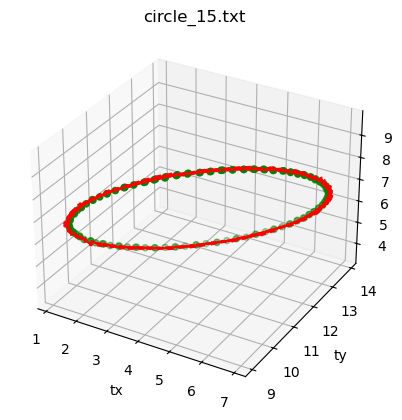

Hello?


<Figure size 640x480 with 0 Axes>

In [156]:
plotSpecific("circle_15.txt", True)

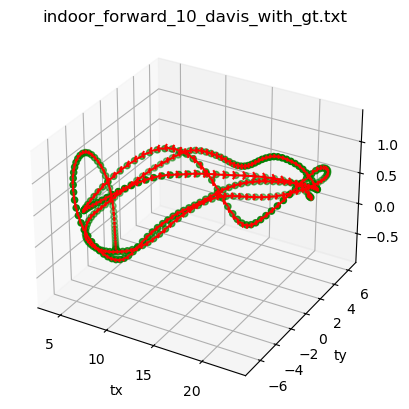

Hello?


<Figure size 640x480 with 0 Axes>

In [158]:
plotSpecific("indoor_forward_10_davis_with_gt.txt", True)

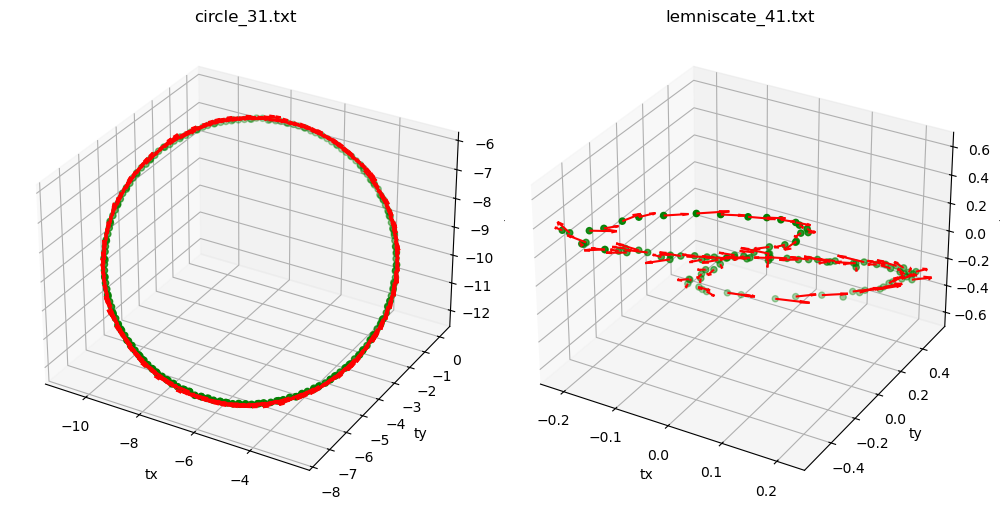

hi


<Figure size 640x480 with 0 Axes>

In [10]:
plotMultiple("data/random_trajectory_100ms", 2)

In [ ]:
# Need to figure out what the above means and calculates...